# Transfer learning (uczenie transferowe) + augmentacja danych (obrazów)

**Case study**: Utwórz notatnik **_Kaggle_** do datasetu https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification?select=test

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import tensorflow as tf
import nltk

In [5]:
# wstępnie wytrenowany model

from tensorflow.keras.applications.vgg19 import VGG19

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

**realizacja zadania**: https://www.kaggle.com/micdab/cats-and-dogs-kodolamacz-13-dl/edit

# Rekurencyjne sieci neuronowe (RNN)

**Zastosowania**:
- ceny akcji
- tłumaczenia językowe
- klasyfikacja tekstu (_sentyment_)
- sumaryzacja / streszczenia

**Problemy językowe** - korzystamy z **transformerów**

_Duże modele językowe_ - raczej nie dotrenowujemy, a umiejętnie korzystamy (np. _ChatGPT_ jest dość tani w korzystaniu)

**Co w zamian?**
- umiejętne przeszukiwanie swoich zbiorów wiedzy (kontekst)
- dawanie przykładów `input --> output`
- kilka razy pytanie w różny sposób (informacje, gramatyka)

## Case study - analiza sentymentów IMDB (filmy)

https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data

### Przygotowanie danych

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import tensorflow as tf
import nltk

In [31]:
from tensorflow.keras.datasets import imdb

maxlen = 400

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000, skip_top=10, maxlen=maxlen)
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000, skip_top=10, maxlen=1000)

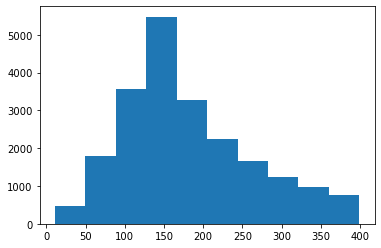

In [32]:
lens = [len(x) for x in X_train]  # 'x' jest sekwencją słów w konkretnej recenzji

plt.hist(lens)
plt.show()

In [33]:
# indeksy konkretnych tokenów, oznaczających słowa występujące w recenzjach

words = [word for x in X_train for word in x if word!=2]  # liczba '2' oznacza prawdopodobnie specjalny token, np. '\n'

min(words), max(words)

(10, 4999)

In [34]:
from tensorflow.keras.preprocessing import sequence

In [35]:
lens[:10]  # długości poszczególnych sekwencji tokenów

[218, 189, 141, 147, 43, 123, 233, 130, 99, 117]

In [36]:
# padding za pomocą zer, aby wyrównać długość sekwencji

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

X_train[:2]  # zera są wstawiane na początku, żeby uniknąć zaniku gradientów w sieci

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [37]:
n_train = 3000
n_test = 1000

X_train, y_train, X_test, y_test = X_train[:n_train], y_train[:n_train], X_test[:n_test], y_test[:n_test]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3000, 400), (1000, 400), (3000,), (1000,))

### Embeddings (osadzenia słów)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, Bidirectional, Embedding
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
?Embedding
?SimpleRNN

In [40]:
n_features = 5000  # liczba tokenów
n_embeddings = 50  # wymiar przestrzeni

model = Sequential()

model.add(Embedding(input_dim=n_features, output_dim=n_embeddings, input_length=maxlen))

model.add(SimpleRNN(32))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 400, 50)           250000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2656      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 252,689
Trainable params: 252,689
Non-trainable params: 0
_________________________________________________________________


In [41]:
early_stopping = EarlyStopping(patience=3)

model.fit(X_train, y_train, epochs=100, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100
75/75 [==============================] - 9s 104ms/step - loss: 0.6938 - accuracy: 0.5083 - val_loss: 0.6915 - val_accuracy: 0.5183
Epoch 2/100
75/75 [==============================] - 7s 99ms/step - loss: 0.5533 - accuracy: 0.8021 - val_loss: 0.6712 - val_accuracy: 0.6083
Epoch 3/100
75/75 [==============================] - 7s 97ms/step - loss: 0.2433 - accuracy: 0.9633 - val_loss: 0.7963 - val_accuracy: 0.5633
Epoch 4/100
75/75 [==============================] - 7s 99ms/step - loss: 0.0514 - accuracy: 0.9971 - val_loss: 0.9067 - val_accuracy: 0.5633
Epoch 5/100
75/75 [==============================] - 7s 100ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.9999 - val_accuracy: 0.5567


In [43]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 1s 27ms/step - loss: 0.9620 - accuracy: 0.5800


[0.9620493054389954, 0.5799999833106995]

### Zadanie: zmodyfikuj podstawową sieć

**Dodatkowy Dense**

In [63]:
n_features = 5000  # liczba tokenów
n_embeddings = 50  # wymiar przestrzeni

model = Sequential()

model.add(Embedding(input_dim=n_features, output_dim=n_embeddings, input_length=maxlen))

model.add(SimpleRNN(32))

model.add(Dense(32, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 400, 50)           250000    
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 32)                2656      
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 253,745
Trainable params: 253,745
Non-trainable params: 0
_________________________________________________________________


In [64]:
early_stopping = EarlyStopping(patience=3)

model.fit(X_train, y_train, epochs=100, callbacks=[early_stopping], validation_split=0.2)

model.evaluate(X_test, y_test)

Epoch 1/100
75/75 [==============================] - 8s 98ms/step - loss: 0.6986 - accuracy: 0.5063 - val_loss: 0.6912 - val_accuracy: 0.5067
Epoch 2/100
75/75 [==============================] - 7s 94ms/step - loss: 0.6676 - accuracy: 0.6062 - val_loss: 0.6628 - val_accuracy: 0.6167
Epoch 3/100
75/75 [==============================] - 7s 94ms/step - loss: 0.5317 - accuracy: 0.7788 - val_loss: 0.5488 - val_accuracy: 0.7400
Epoch 4/100
75/75 [==============================] - 8s 101ms/step - loss: 0.2834 - accuracy: 0.9154 - val_loss: 0.5488 - val_accuracy: 0.7317
Epoch 5/100
75/75 [==============================] - 7s 97ms/step - loss: 0.0993 - accuracy: 0.9867 - val_loss: 0.5099 - val_accuracy: 0.8017
Epoch 6/100
75/75 [==============================] - 7s 93ms/step - loss: 0.0815 - accuracy: 0.9833 - val_loss: 0.5602 - val_accuracy: 0.7733
Epoch 7/100
75/75 [==============================] - 8s 103ms/step - loss: 0.0228 - accuracy: 0.9992 - val_loss: 0.5927 - val_accuracy: 0.7783
Epoc

[0.697429895401001, 0.7630000114440918]

**Dropout**

In [65]:
n_features = 5000  # liczba tokenów
n_embeddings = 50  # wymiar przestrzeni

model = Sequential()

model.add(Embedding(input_dim=n_features, output_dim=n_embeddings, input_length=maxlen))
model.add(Dropout(0.5))

model.add(SimpleRNN(32))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 400, 50)           250000    
                                                                 
 dropout (Dropout)           (None, 400, 50)           0         
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 32)                2656      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 252,689
Trainable params: 252,689
Non-trainable params: 0
_________________________________________________________________


In [66]:
early_stopping = EarlyStopping(patience=3)

model.fit(X_train, y_train, epochs=100, callbacks=[early_stopping], validation_split=0.2)

model.evaluate(X_test, y_test)

Epoch 1/100
75/75 [==============================] - 10s 115ms/step - loss: 0.6965 - accuracy: 0.5167 - val_loss: 0.6889 - val_accuracy: 0.5217
Epoch 2/100
75/75 [==============================] - 8s 110ms/step - loss: 0.6133 - accuracy: 0.7317 - val_loss: 0.6364 - val_accuracy: 0.6567
Epoch 3/100
75/75 [==============================] - 8s 113ms/step - loss: 0.4176 - accuracy: 0.8350 - val_loss: 0.4940 - val_accuracy: 0.7717
Epoch 4/100
75/75 [==============================] - 9s 116ms/step - loss: 0.2780 - accuracy: 0.9075 - val_loss: 0.4450 - val_accuracy: 0.8067
Epoch 5/100
75/75 [==============================] - 8s 107ms/step - loss: 0.1444 - accuracy: 0.9663 - val_loss: 0.4711 - val_accuracy: 0.8017
Epoch 6/100
75/75 [==============================] - 8s 106ms/step - loss: 0.0774 - accuracy: 0.9821 - val_loss: 0.5633 - val_accuracy: 0.7567
Epoch 7/100
32/32 [==============================] - 1s 31ms/step - loss: 0.5577 - accuracy: 0.7850


[0.557651698589325, 0.7850000262260437]

**Bidirectional RNN**

In [44]:
n_features = 5000  # liczba tokenów
n_embeddings = 50  # wymiar przestrzeni

model = Sequential()

model.add(Embedding(input_dim=n_features, output_dim=n_embeddings, input_length=maxlen))

model.add(Bidirectional(SimpleRNN(32)))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 400, 50)           250000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               5312      
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 255,377
Trainable params: 255,377
Non-trainable params: 0
_________________________________________________________________


In [45]:
early_stopping = EarlyStopping(patience=3)

model.fit(X_train, y_train, epochs=100, callbacks=[early_stopping], validation_split=0.2)

model.evaluate(X_test, y_test)

Epoch 1/100
75/75 [==============================] - 11s 118ms/step - loss: 0.6983 - accuracy: 0.4979 - val_loss: 0.6928 - val_accuracy: 0.5300
Epoch 2/100
75/75 [==============================] - 9s 114ms/step - loss: 0.6680 - accuracy: 0.6296 - val_loss: 0.6883 - val_accuracy: 0.5750
Epoch 3/100
75/75 [==============================] - 9s 115ms/step - loss: 0.6051 - accuracy: 0.7446 - val_loss: 0.6768 - val_accuracy: 0.5517
Epoch 4/100
75/75 [==============================] - 9s 121ms/step - loss: 0.4225 - accuracy: 0.9029 - val_loss: 0.6157 - val_accuracy: 0.6667
Epoch 5/100
75/75 [==============================] - 9s 119ms/step - loss: 0.1749 - accuracy: 0.9812 - val_loss: 0.6217 - val_accuracy: 0.6550
Epoch 6/100
75/75 [==============================] - 8s 112ms/step - loss: 0.0465 - accuracy: 0.9987 - val_loss: 0.7093 - val_accuracy: 0.6333
Epoch 7/100
32/32 [==============================] - 1s 32ms/step - loss: 0.7505 - accuracy: 0.6680


[0.7504892945289612, 0.6679999828338623]

**LSTM (Long Short-Term Memory**

In [47]:
n_features = 5000  # liczba tokenów
n_embeddings = 50  # wymiar przestrzeni

model = Sequential()

model.add(Embedding(input_dim=n_features, output_dim=n_embeddings, input_length=maxlen))

model.add(LSTM(32))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 400, 50)           250000    
                                                                 
 lstm (LSTM)                 (None, 32)                10624     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 260,657
Trainable params: 260,657
Non-trainable params: 0
_________________________________________________________________


In [48]:
early_stopping = EarlyStopping(patience=3)

model.fit(X_train, y_train, epochs=100, callbacks=[early_stopping], validation_split=0.2)

model.evaluate(X_test, y_test)

Epoch 1/100
75/75 [==============================] - 16s 185ms/step - loss: 0.6849 - accuracy: 0.5813 - val_loss: 0.6384 - val_accuracy: 0.7100
Epoch 2/100
75/75 [==============================] - 13s 180ms/step - loss: 0.4441 - accuracy: 0.8279 - val_loss: 0.3553 - val_accuracy: 0.8450
Epoch 3/100
75/75 [==============================] - 13s 179ms/step - loss: 0.2003 - accuracy: 0.9329 - val_loss: 0.3569 - val_accuracy: 0.8533
Epoch 4/100
75/75 [==============================] - 13s 172ms/step - loss: 0.1166 - accuracy: 0.9679 - val_loss: 0.3966 - val_accuracy: 0.8233
Epoch 5/100
32/32 [==============================] - 2s 66ms/step - loss: 0.4364 - accuracy: 0.8260


[0.43640032410621643, 0.8259999752044678]

**Bidirectional LSTM**

In [61]:
n_features = 5000  # liczba tokenów
n_embeddings = 50  # wymiar przestrzeni

model = Sequential()

model.add(Embedding(input_dim=n_features, output_dim=n_embeddings, input_length=maxlen))

model.add(Bidirectional(LSTM(32)))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 400, 50)           250000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               21248     
 nal)                                                            
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 271,313
Trainable params: 271,313
Non-trainable params: 0
_________________________________________________________________


In [62]:
early_stopping = EarlyStopping(patience=3)

model.fit(X_train, y_train, epochs=100, callbacks=[early_stopping], validation_split=0.2)

model.evaluate(X_test, y_test)

Epoch 1/100
75/75 [==============================] - 15s 164ms/step - loss: 0.6671 - accuracy: 0.6125 - val_loss: 0.6269 - val_accuracy: 0.6050
Epoch 2/100
75/75 [==============================] - 11s 153ms/step - loss: 0.4954 - accuracy: 0.7821 - val_loss: 0.4432 - val_accuracy: 0.8067
Epoch 3/100
75/75 [==============================] - 12s 164ms/step - loss: 0.3617 - accuracy: 0.8650 - val_loss: 0.4127 - val_accuracy: 0.8267
Epoch 4/100
75/75 [==============================] - 11s 146ms/step - loss: 0.2420 - accuracy: 0.9196 - val_loss: 0.3916 - val_accuracy: 0.8333
Epoch 5/100
75/75 [==============================] - 11s 144ms/step - loss: 0.1739 - accuracy: 0.9421 - val_loss: 0.4062 - val_accuracy: 0.8133
Epoch 6/100
75/75 [==============================] - 11s 145ms/step - loss: 0.1187 - accuracy: 0.9688 - val_loss: 0.4978 - val_accuracy: 0.7917
Epoch 7/100
32/32 [==============================] - 2s 63ms/step - loss: 0.4649 - accuracy: 0.8290


[0.4649234116077423, 0.8289999961853027]

**Dwuwarstwowy RNN**

In [57]:
n_features = 5000  # liczba tokenów
n_embeddings = 50  # wymiar przestrzeni

model = Sequential()

model.add(Embedding(input_dim=n_features, output_dim=n_embeddings, input_length=maxlen))

model.add(SimpleRNN(32, return_sequences=True))  # potrezbne, żeby nie wyrzucać całej macierzy wyników
model.add(SimpleRNN(32))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 400, 50)           250000    
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 400, 32)           2656      
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 254,769
Trainable params: 254,769
Non-trainable params: 0
_________________________________________________________________


In [58]:
early_stopping = EarlyStopping(patience=3)

model.fit(X_train, y_train, epochs=100, callbacks=[early_stopping], validation_split=0.2)

model.evaluate(X_test, y_test)

Epoch 1/100
75/75 [==============================] - 17s 199ms/step - loss: 0.6963 - accuracy: 0.5158 - val_loss: 0.6968 - val_accuracy: 0.4967
Epoch 2/100
75/75 [==============================] - 14s 183ms/step - loss: 0.5352 - accuracy: 0.7312 - val_loss: 0.7646 - val_accuracy: 0.5383
Epoch 3/100
75/75 [==============================] - 13s 173ms/step - loss: 0.1184 - accuracy: 0.9729 - val_loss: 1.0315 - val_accuracy: 0.5300
Epoch 4/100
32/32 [==============================] - 2s 54ms/step - loss: 1.1740 - accuracy: 0.5440


[1.173995852470398, 0.5440000295639038]

**Dwuwarstwowy LSTM**

In [59]:
n_features = 5000  # liczba tokenów
n_embeddings = 50  # wymiar przestrzeni

model = Sequential()

model.add(Embedding(input_dim=n_features, output_dim=n_embeddings, input_length=maxlen))

model.add(LSTM(32, return_sequences=True))  # potrezbne, żeby nie wyrzucać całej macierzy wyników
model.add(LSTM(32))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 400, 50)           250000    
                                                                 
 lstm_3 (LSTM)               (None, 400, 32)           10624     
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 268,977
Trainable params: 268,977
Non-trainable params: 0
_________________________________________________________________


In [60]:
early_stopping = EarlyStopping(patience=3)

model.fit(X_train, y_train, epochs=100, callbacks=[early_stopping], validation_split=0.2)

model.evaluate(X_test, y_test)

Epoch 1/100
75/75 [==============================] - 28s 335ms/step - loss: 0.6690 - accuracy: 0.5779 - val_loss: 0.5770 - val_accuracy: 0.7200
Epoch 2/100
75/75 [==============================] - 24s 324ms/step - loss: 0.4058 - accuracy: 0.8263 - val_loss: 0.4195 - val_accuracy: 0.8250
Epoch 3/100
75/75 [==============================] - 27s 356ms/step - loss: 0.1870 - accuracy: 0.9354 - val_loss: 0.5331 - val_accuracy: 0.8033
Epoch 4/100
75/75 [==============================] - 26s 350ms/step - loss: 0.0803 - accuracy: 0.9767 - val_loss: 0.6215 - val_accuracy: 0.8083
Epoch 5/100
32/32 [==============================] - 4s 128ms/step - loss: 0.6329 - accuracy: 0.7810


[0.6328763961791992, 0.781000018119812]

## Gotowe, wytrenowane zanurzenia słów (embeddings)

**realizacja zadania**: https://www.kaggle.com/code/micdab/lstm-using-pretrained-embeddings/edit